# Question 1a with single Hidden layer and 5 hidden nodes 

In [1]:
import numpy as np 
import math
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelBinarizer

# Question 1a 

In [2]:
def sigmoid(z):
    return  1/(1+np.exp(-z))

def build_model(X,input_dim,hidden_nodes,output_dim):
    model = {}
     
    model['W1'] =  np.random.randn(input_dim, hidden_nodes) / np.sqrt(input_dim) 
    model['b1'] =  np.random.randn(1, hidden_nodes)
    model['W2'] = np.random.randn(hidden_nodes, output_dim) / np.sqrt(hidden_nodes)
    model['b2'] =  np.random.randn(1, output_dim)
    return model

def feed_forward(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation layer 2 
    z2 = x.dot(W1) + b1
    a2 = sigmoid(z2)
    #print("z2:",z2)
    # Forward propagation layer 3 
    z3 = a2.dot(W2) + b2
    a3 = sigmoid(z3)
    #print("z3:",z3)
    return a2,a3

def backprop(x,y,model,a2,a3,dW1,db1,dW2,db2):
    #layer 3 error do
    del3 = a3 - y
    #print("del3:",del3)
    db2 += np.sum(del3, axis=0, keepdims=True)
    dW2 += (a2.T).dot(del3)
    #print("db2:",db2)
    #print("dW2:",dW2)
    #layer 2 error do 
         
    del2 = np.multiply(del3.dot(model['W2'].T),(a2*(1-a2)))
    #print("del2:",del2)
    db1 += np.sum(del2, axis=0)
    dW1 += np.dot(x.T, del2)
    
    #print("db1:",db1)
    #print("dW1:",dW1)
    # Add regularization terms
    #dW2 += reg_lambda * model['W2']
    #dW1 += reg_lambda * model['W1']
    
    return dW1, dW2, db1, db2


def calculate_loss(N,model,a3,y_true,sum_cost):
    
    sum_cost +=np.sum((y_true*np.log(a3))+((1-y_true)*np.log(1-a3)))
    #print("sum_cost",sum_cost)
    #sum_cost += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return sum_cost

def train(N,model, X_train, y_train, reg_lambda, learning_rate,hidden_nodes):
    # Batch gradient descent
    done = False
    previous_loss = float('inf')
    i = 0
    
    losses = []
    #while done == False:  #comment out while performance testing
    while i < 300:
        scost=0
        dW1 =np.random.randn(input_dim, hidden_nodes) / np.sqrt(input_dim) 
        db1 = np.random.randn(1, hidden_nodes)
        dW2 = np.random.randn(hidden_nodes, output_dim) / np.sqrt(hidden_nodes)
        db2 = np.random.randn(1, output_dim)
        
        for row in zip(X_train, y_train):
            #feed forward
            #print("shape",row[0].shape,"y shape", row[1].shape,row[0][None,:].shape,row[1][None,:])
            a2,a3 = feed_forward(model, row[0][None,:])
            #print("model",model)
            #print("a2:",a2,"a3:",a3)
            
            #Backward propagation
            #print("for back prop:",row[0][None,:],row[1][None,:])
            dW1, dW2, db1, db2 = backprop(row[0][None,:],row[1][None,:],model,a2,a3,dW1,db1,dW2,db2)
            #print("dW1",dW1,"dW2","db1",db1,"db2",db2)
            
            #cost
            cost = calculate_loss(N,model, a3,row[1][None,:], scost)
            #print("cost:",cost)
        #update weights and biases
        model['W1'] -= learning_rate* ((dW1/N) + (reg_lambda/N)*model['W1'])
        model['b1'] -= learning_rate*(db1/N)
        model['W2'] -= learning_rate* ((dW2/N) + (reg_lambda/N)*model['W2'])
        model['b2'] -= learning_rate*(db2/N)
            
        
        loss = (-1/N)*cost
        #print("cost:",cost,"loss:",loss)
        losses.append(loss)
        if i%100==0:
            print ("Loss after iteration %i: %f" %(i, loss))  #uncomment once testing finished, return mod val to 1000
        #if (previous_loss-loss) < 0.001:
            #done = True
            #print("convergence i:",i) 
            #break
        previous_loss = loss
        i += 1
    return model, losses


In [3]:

sdataset = pd.read_csv('BSOM_DataSet_for_HW3.csv')
X = sdataset.loc[:,['all_mcqs_avg_n20','all_NBME_avg_n4','CBSE_01','CBSE_02']].values
y = sdataset.loc[:,['LEVEL']].values

#Feature Scaling using Mean normalization 
mean_norm_X = (X-np.mean(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
#One vs all y_train
concat=[]
for i in np.unique(y):
    one_vs_all_y=np.where(y==i,1,0)
    concat.extend(list(zip(*one_vs_all_y)))
actual_y= np.asarray(concat).T 

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(mean_norm_X, actual_y,stratify=y, test_size = 1/3)

N,input_dim = X_train.shape 
# output layer dimensionality 
output_dim = len(np.unique(y)) 
# learning rate for gradient descent
learning_rate = 0.6



In [4]:
hidden_nodes=5
reg_lambda = 0 # regularization strength
model = build_model(X_train,input_dim,hidden_nodes,output_dim)
model, losses = train(N,model,X_train, y_train, reg_lambda, learning_rate,hidden_nodes)

Loss after iteration 0: 0.034602
Loss after iteration 100: 0.020710
Loss after iteration 200: 0.015692


# Question 1d Performance metrics 

In [5]:

y_true = []
y_pred = []
for row in zip(X_test, y_test):
    a2, a3 = feed_forward(model, row[0][None,:])
    y_pred.append(np.argmax(a3))
    y_true.append(np.argmax(row[1][None,:]))
print("y_true",y_true)
print("y_pred",y_pred)
print(classification_report(y_true, y_pred,target_names=['A', 'B', 'C','D']))   
print("confusion matrix:",confusion_matrix(y_true, y_pred))
print("Accuracy:",accuracy_score(y_true, y_pred))
lb = LabelBinarizer()
lb.fit(y_true)
y_t= lb.transform(y_true)
y_p = lb.transform(y_pred)

print("ROC AUC score",metrics.roc_auc_score(y_t,y_p))


y_true [0, 1, 2, 0, 1, 1, 1, 2, 3, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 3, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2]
y_pred [0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2]
             precision    recall  f1-score   support

          A       0.83      1.00      0.91        10
          B       0.64      0.53      0.58        17
          C       0.46      0.60      0.52        10
          D       0.00      0.00      0.00         2

avg / total       0.61      0.64      0.62        39

confusion matrix: [[10  0  0  0]
 [ 2  9  6  0]
 [ 0  4  6  0]
 [ 0  1  1  0]]
Accuracy: 0.6410256410256411
ROC AUC score 0.6989742762308685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [6]:
def fscore(y_true, y_pred):
    f1_macro = f1_score(y_test, y_pred, average='macro')  
    print("F1 macro :" ,f1_macro)
    f1_micro  = f1_score(y_test, y_pred, average='micro')  
    print("F1 micro :" ,f1_micro)
    f1_weighted = f1_score(y_test, y_pred, average='weighted')  
    print("F1 weighted :" ,f1_weighted)
    f1 = f1_score(y_test, y_pred, average=None)
    print("F1 score :" ,f1)
fscore(y_t,y_p)

F1 macro : 0.5028688002040036
F1 micro : 0.6410256410256411
F1 weighted : 0.6199812342869847
F1 score : [0.90909091 0.58064516 0.52173913 0.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Plotting the cost function 

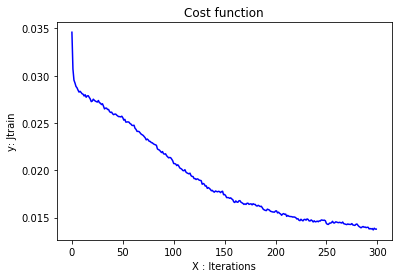

In [7]:
plt.plot(losses,  color='blue')
plt.xlabel('X : Iterations')
plt.ylabel('y: Jtrain')
plt.title('Cost function')
plt.show()

# Question 1b with hidden nodes (3, 5, 7 ,9,11)

In [8]:
hiddennodes= [2,3,5,7,9,11,13]
reg_lambda = 0 
for hidden_nodes in hiddennodes:
    print("For HIDDEN NODES:",hidden_nodes)
    model2 = build_model(X_train,input_dim,hidden_nodes,output_dim)
    model2, losses2 = train(N,model2,X_train, y_train, reg_lambda, learning_rate,hidden_nodes)
    y_true = []
    y_pred = []
    for row in zip(X_test, y_test):
        a2, a3 = feed_forward(model2, row[0][None,:])
        y_pred.append(np.argmax(a3))
        y_true.append(np.argmax(row[1][None,:]))
    print("y_true",y_true)
    print("y_pred",y_pred)
    print(classification_report(y_true, y_pred,target_names=['A', 'B', 'C','D']))   
    print("confusion matrix:",confusion_matrix(y_true, y_pred))
    print("Accuracy:",accuracy_score(y_true, y_pred))
    fscore(y_t,y_p)
    lb = LabelBinarizer()
    lb.fit(y_true)
    y_t= lb.transform(y_true)
    y_p = lb.transform(y_pred)

    print("ROC AUC score",metrics.roc_auc_score(y_t,y_p))

For HIDDEN NODES: 2
Loss after iteration 0: 0.031556
Loss after iteration 100: 0.027272
Loss after iteration 200: 0.019013
y_true [0, 1, 2, 0, 1, 1, 1, 2, 3, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 3, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2]
y_pred [0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2]
             precision    recall  f1-score   support

          A       0.90      0.90      0.90        10
          B       0.62      0.59      0.61        17
          C       0.46      0.60      0.52        10
          D       0.00      0.00      0.00         2

avg / total       0.62      0.64      0.63        39

confusion matrix: [[ 9  1  0  0]
 [ 1 10  6  0]
 [ 0  4  6  0]
 [ 0  1  1  0]]
Accuracy: 0.6410256410256411
F1 macro : 0.5028688002040036
F1 micro : 0.6410256410256411
F1 weighted : 0.6199812342869847
F1 score : [0.90909091 0.58064516 0.52173913 0.        ]
ROC AUC score 0.6924557440531072
For HIDDEN NODE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Loss after iteration 100: 0.020417
Loss after iteration 200: 0.013951
y_true [0, 1, 2, 0, 1, 1, 1, 2, 3, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 3, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2]
y_pred [0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2]
             precision    recall  f1-score   support

          A       0.82      0.90      0.86        10
          B       0.60      0.53      0.56        17
          C       0.46      0.60      0.52        10
          D       0.00      0.00      0.00         2

avg / total       0.59      0.62      0.60        39

confusion matrix: [[9 1 0 0]
 [2 9 6 0]
 [0 4 6 0]
 [0 1 1 0]]
Accuracy: 0.6153846153846154
F1 macro : 0.5069499341238471
F1 micro : 0.6410256410256411
F1 weighted : 0.6287287591635419
F1 score : [0.9        0.60606061 0.52173913 0.        ]
ROC AUC score 0.6807924580490503
For HIDDEN NODES: 5
Loss after iteration 0: 0.046467
Loss after iteration 100: 0.024